***Suicide Rate Survival continued now using Regression Models.***

Keeping in mind my analysis from the previous notebook, This was the final dataframe that I had. I have received some feedback for the assignment and I will incorporate said feedback in this assignment, mainly about redundant features. I will eliminate gdp per year, and maintain gdp per capita, as that number is equalized towards the population. I will also keep the population, and I will also incorporate generation and age data as one-hot encoded data using the LabelEncoder. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np
import pandas as pd


# Locate and load the data file
df = pd.read_csv('~/HW/HW3_Yahya/EP_Dataset_Sui/master.csv')

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.columns

N rows=27820, M columns=12


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [3]:
dt = df
#One hot encoding sex
dt['sex'] = dt['sex'].map({'female':0,'male':1})

#  fill ''HDI for year' nulls with previous values
dt['HDI for year'].fillna(method='ffill', inplace=True)

#  drop remaining''HDI for year' nulls
dt.drop(dt[dt['HDI for year'].isnull()].index, inplace = True)
dt.drop(['country-year'], axis=1, inplace = True)
dt.drop(['country'], axis=1, inplace = True)
dt = dt.convert_dtypes()
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27748 entries, 72 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27748 non-null  Int64  
 1   sex                 27748 non-null  Int64  
 2   age                 27748 non-null  string 
 3   suicides_no         27748 non-null  Int64  
 4   population          27748 non-null  Int64  
 5   suicides/100k pop   27748 non-null  Float64
 6   HDI for year        27748 non-null  Float64
 7    gdp_for_year ($)   27748 non-null  string 
 8   gdp_per_capita ($)  27748 non-null  Int64  
 9   generation          27748 non-null  string 
dtypes: Float64(2), Int64(5), string(3)
memory usage: 2.3 MB


## Encoding

In [4]:
dt_Corr = dt
dt_Corr = dt_Corr.drop('suicides_no', axis=1) #synonymous with target

dt_Corr['age'] = dt_Corr['age'].map({
        '5-14 years':0,'15-24 years':1,'25-34 years':2,
        '35-54 years':3,'55-74 years':4,'75+ years':5})

dt_Corr['generation'] = dt_Corr['generation'].map({
        'Generation Z':0,'Millenials':1,'Generation X':2,
        'Boomers':3,'Silent':4,'G.I. Generation':5})
dt_Corr

,year,sex,age,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,1995,1,2,232900,5.58,0.619,"2,424,499,009",835,2
73,1995,1,4,178000,5.06,0.619,"2,424,499,009",835,4
74,1995,0,5,40800,4.9,0.619,"2,424,499,009",835,5
75,1995,0,1,283500,4.59,0.619,"2,424,499,009",835,2
76,1995,1,1,241200,4.56,0.619,"2,424,499,009",835,2
...,...,...,...,...,...,...,...,...,...
27815,2014,0,3,3620833,2.96,0.675,"63,067,077,179",2309,2
27816,2014,0,5,348465,2.58,0.675,"63,067,077,179",2309,4
27817,2014,1,0,2762158,2.17,0.675,"63,067,077,179",2309,0
27818,2014,0,0,2631600,1.67,0.675,"63,067,077,179",2309,0


## Feature Selection

<Axes: title={'center': 'Suicide Correlation'}>

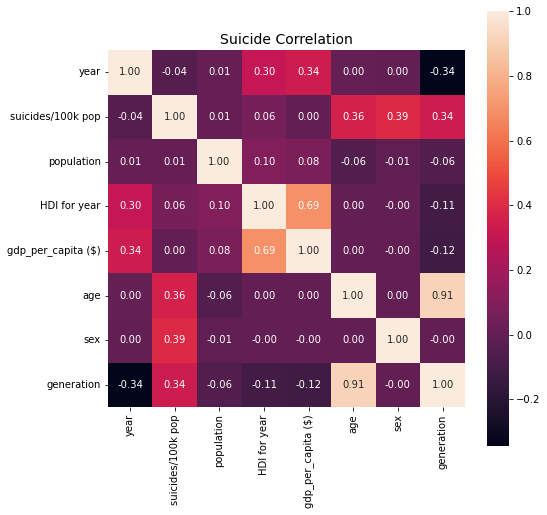

In [5]:
import seaborn as sns
#  Correlations - OVERALL
continuous = ['year','suicides/100k pop', 'population', 'HDI for year', 'gdp_per_capita ($)', 'age', 'sex', 'generation']

dataCorr = dt_Corr[continuous].corr()

#  print correlation
dataCorr['suicides/100k pop'].sort_values(ascending=False)

#  plot heatmap
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True)

Age, sex, and generation all seem to have the best correlation with our target variable. So we will ommit the other continuous variables.
Since we are applying a linear regression, we are looking for continuous variables with linear correlation to our target variable. 
year, population and HDI have very poor linear relationship with the target variable, so we will ommit them.

***working with one-hot encoded dataset***

In [6]:
dt_OH = pd.get_dummies(dt, columns = ['age', 'generation'])


In [7]:
dt_OH.columns

Index(['year', 'sex', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'age_15-24 years', 'age_25-34 years', 'age_35-54 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years',
       'generation_Boomers', 'generation_G.I. Generation',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent'],
      dtype='object')

In [8]:
dt_OH = dt_OH.drop('suicides_no', axis=1) #synonymous with target

dt_OH = dt_OH.drop(['HDI for year', 'gdp_per_capita ($)'], axis=1)
dt_OH

,year,sex,population,suicides/100k pop,gdp_for_year ($),age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
72,1995,1,232900,5.58,"2,424,499,009",0,1,0,0,0,0,0,0,1,0,0,0
73,1995,1,178000,5.06,"2,424,499,009",0,0,0,0,1,0,0,0,0,0,0,1
74,1995,0,40800,4.9,"2,424,499,009",0,0,0,0,0,1,0,1,0,0,0,0
75,1995,0,283500,4.59,"2,424,499,009",1,0,0,0,0,0,0,0,1,0,0,0
76,1995,1,241200,4.56,"2,424,499,009",1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,0,3620833,2.96,"63,067,077,179",0,0,1,0,0,0,0,0,1,0,0,0
27816,2014,0,348465,2.58,"63,067,077,179",0,0,0,0,0,1,0,0,0,0,0,1
27817,2014,1,2762158,2.17,"63,067,077,179",0,0,0,1,0,0,0,0,0,1,0,0
27818,2014,0,2631600,1.67,"63,067,077,179",0,0,0,1,0,0,0,0,0,1,0,0


Sex, Age, and Generation have the highest correlation to the target variable suicides/100k pop. So we will remove population, HDI for year, gdp and year columns.

In [9]:
dt_OH = dt_OH.drop(['population', 'year', ' gdp_for_year ($) ',], axis=1)

## Normalization

In [10]:
#Now we will standardize the numerical data before applying regression techniques.
continuous = ['suicides/100k pop',]
from sklearn.preprocessing import StandardScaler

rc = StandardScaler()
dt_OH[continuous] = rc.fit_transform(dt_OH[continuous])


In [11]:
type(dt_OH)
dt_OH

,sex,suicides/100k pop,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
72,1,-0.382696,0,1,0,0,0,0,0,0,1,0,0,0
73,1,-0.410095,0,0,0,0,1,0,0,0,0,0,0,1
74,0,-0.418526,0,0,0,0,0,1,0,1,0,0,0,0
75,0,-0.434861,1,0,0,0,0,0,0,0,1,0,0,0
76,1,-0.436442,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0,-0.520749,0,0,1,0,0,0,0,0,1,0,0,0
27816,0,-0.540772,0,0,0,0,0,1,0,0,0,0,0,1
27817,1,-0.562376,0,0,0,1,0,0,0,0,0,1,0,0
27818,0,-0.588722,0,0,0,1,0,0,0,0,0,1,0,0


In [12]:
X = dt_OH.loc[:, dt_OH.columns != 'suicides/100k pop']
y = dt_OH.loc[:, dt_OH.columns == 'suicides/100k pop']
X.columns

Index(['sex', 'age_15-24 years', 'age_25-34 years', 'age_35-54 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years',
       'generation_Boomers', 'generation_G.I. Generation',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent'],
      dtype='object')

In [13]:
X_arr = X.values
y_arr = y.values.ravel()
y_arr

array([-0.38269552, -0.41009547, -0.41852622, ..., -0.56237594,
       -0.58872204, -0.5997874 ])

In [17]:
indeces = np.where((dt_OH['age_15-24 years'] == 1) & (dt_OH['sex'] == 1) & (dt_OH['generation_Generation X'] == 1))[0] #get index values of data that will be used for a prediction
print(indeces)
print(dt_OH.iloc[indeces].head) #Sanity Check

[    4    13    25 ... 27584 27595 27607]
<bound method NDFrame.head of        sex  suicides/100k pop  age_15-24 years  age_25-34 years  \
76       1          -0.436442                1                0   
85       1          -0.308926                1                0   
97       1           0.034627                1                0   
109      1          -0.105008                1                0   
121      1          -0.171927                1                0   
...    ...                ...              ...              ...   
27632    1          -0.074446                1                0   
27644    1          -0.034400                1                0   
27656    1          -0.076554                1                0   
27667    1           0.041477                1                0   
27679    1           0.063081                1                0   

       age_35-54 years  age_5-14 years  age_55-74 years  age_75+ years  \
76                   0               0           

***Now let's develop a multiple linear regression model, and use our model to predict variable for a hypothetical person***

In [14]:
test_point = pd.DataFrame(data={
    'sex': [1],
    'age_15-24 years': [1],
    'age_25-34 years': [0],
    'age_35-54 years': [0],
    'age_5-14 years': [0],
    'age_55-74 years': [0],
    'age_75+ years': [0],
    'generation_Boomers': [0],
    'generation_G.I. Generation': [0],
    'generation_Generation X': [1],
    'generation_Generation Z': [0],
    'generation_Millenials': [0],
    'generation_Silent': [0]})

test_point = test_point.values

In [15]:
from sklearn.linear_model import LinearRegression

le = LinearRegression(n_jobs=-1)
le.fit(X_arr, y_arr)
print(le.coef_)
print(len(le.coef_)) #19 regression coefficients corresponding to the 19 columns.

[ 7.84055952e-01  8.75399301e+12  8.75399301e+12  8.75399301e+12
  8.75399301e+12  8.75399301e+12  8.75399301e+12 -3.53904346e+12
 -3.53904346e+12 -3.53904346e+12 -3.53904346e+12 -3.53904346e+12
 -3.53904346e+12]
13


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred = le.predict(test_point) #asking for a prediction (values on line of regression) for hypothetical value
mae = mean_absolute_error(np.array([np.mean(np.array(y_arr[indeces]))]), y_pred)  #compare that prediction (point on regression line) vs actual point (average of all target characteristic points)
print('Mean Absolute Error Prediction', mae) 

y_pred_tot = le.predict(X_arr)
mae2 = mean_absolute_error(y_arr, y_pred_tot)
r2 = r2_score(y_arr, y_pred_tot)
mse = mean_squared_error(y_arr, y_pred_tot)

print('\nMean Absolute Error of regression', mae2)
print('R Squared of regression', r2)
print('Mean Squared Error of regression', mse)

Mean Absolute Error Prediction 0.12002587892905066

Mean Absolute Error of regression 0.5376993302879745
R Squared of regression 0.2964746198815811
Mean Squared Error of regression 0.7035253801184186


***Using the average of all target characteristic points was approved by Dr.Diekemper, I asked him good ways to evaluate the model, and he suggested this way. Previously, I had a model that trains on all the data, and predicts on training subset of characteristic points, this gives us an array of predicted values that exist on the regression. Then we compute the MAE of the array of predicted values vs the actual target values of the characteristic subset of points.***

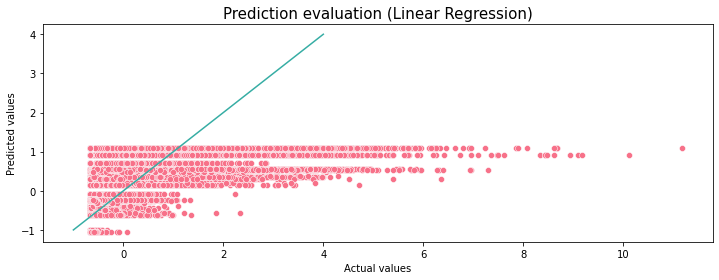

In [27]:
import seaborn as sns

#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(y=y_pred_tot, x=y_arr, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot(x=[-1, 4], y=[-1, 4], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***Now we will use the original sex, age and generation variables in numerical form and
develop a new model. Use your model to predict the target value for the people with age
20, male, and generation X. What is the MAE error of this prediction? How many line
coefficients are there?***

In [28]:
dt_Corr = dt_Corr.drop(['year', 'population','HDI for year', 'gdp_per_capita ($)'], axis=1)

In [29]:
dt_Corr

,sex,age,suicides/100k pop,gdp_for_year ($),generation
72,1,2,5.58,"2,424,499,009",2
73,1,4,5.06,"2,424,499,009",4
74,0,5,4.9,"2,424,499,009",5
75,0,1,4.59,"2,424,499,009",2
76,1,1,4.56,"2,424,499,009",2
...,...,...,...,...,...
27815,0,3,2.96,"63,067,077,179",2
27816,0,5,2.58,"63,067,077,179",4
27817,1,0,2.17,"63,067,077,179",0
27818,0,0,1.67,"63,067,077,179",0


In [30]:
dt_Corr = dt_Corr.drop([' gdp_for_year ($) '], axis=1)
dt_Corr

,sex,age,suicides/100k pop,generation
72,1,2,5.58,2
73,1,4,5.06,4
74,0,5,4.9,5
75,0,1,4.59,2
76,1,1,4.56,2
...,...,...,...,...
27815,0,3,2.96,2
27816,0,5,2.58,4
27817,1,0,2.17,0
27818,0,0,1.67,0


In [31]:
from sklearn.preprocessing import StandardScaler

#Now we will standardize the numerical data before applying regression techniques.
continuous_red = ['suicides/100k pop']
from sklearn.preprocessing import StandardScaler

rc = StandardScaler()
dt_Corr[continuous_red] = rc.fit_transform(dt_Corr[continuous_red])
dt_Corr

,sex,age,suicides/100k pop,generation
72,1,2,-0.382696,2
73,1,4,-0.410095,4
74,0,5,-0.418526,5
75,0,1,-0.434861,2
76,1,1,-0.436442,2
...,...,...,...,...
27815,0,3,-0.520749,2
27816,0,5,-0.540772,4
27817,1,0,-0.562376,0
27818,0,0,-0.588722,0


In [32]:
X_corr = dt_Corr.loc[:, dt_Corr.columns != 'suicides/100k pop']
y_corr = dt_Corr.loc[:, dt_Corr.columns == 'suicides/100k pop']

X_corr_arr = X_corr.values
y_corr_arr = y_corr.values.ravel()

In [33]:
from sklearn.linear_model import LinearRegression

le = LinearRegression(n_jobs=-1)
le.fit(X_corr_arr, y_corr_arr)
print(le.coef_)
print(len(le.coef_)) #3 regression coefficients corresponding to the 3 columns.

[0.78405595 0.19392146 0.02481899]
3


In [35]:
test_point_Z = pd.DataFrame(data={
    'sex': [1],
    'age': [1],
    'generation_Silent': [2]})

test_point_Z = test_point_Z.values
test_point_Z

array([[1, 1, 2]])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred = le.predict(test_point_Z) 
mae = mean_absolute_error(np.array([np.mean(np.array(y_corr_arr[indeces]))]), y_pred)  
print('Mean Absolute Error Prediction', mae) 

y_pred_tot = le.predict(X_corr_arr)
mae2 = mean_absolute_error(y_corr_arr, y_pred_tot)
r2 = r2_score(y_corr_arr, y_pred_tot)
mse = mean_squared_error(y_corr_arr, y_pred_tot)

print('\nMean Absolute Error of regression', mae2)
print('R Squared of regression', r2)
print('Mean Squared Error of regression', mse)

Mean Absolute Error Prediction 0.005598424429904256

Mean Absolute Error of regression 0.5446457327916561
R Squared of regression 0.28574975793279445
Mean Squared Error of regression 0.7142502420672052


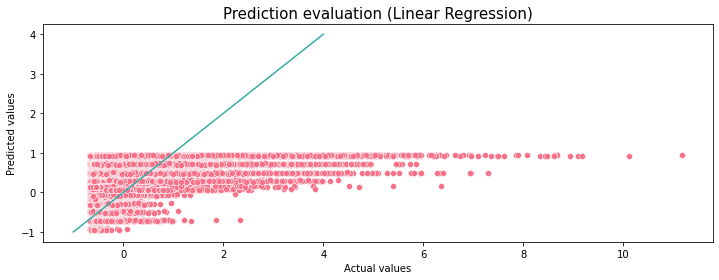

In [37]:
import seaborn as sns

#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(y=y_pred_tot, x=y_corr_arr, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot(x=[-1, 4], y=[-1, 4], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

#The line here is when predicted values = actual values.

***Are there any differences in the two model performances?***

Our prediction of a hypothetical point in comparison to the average of the subset that characterize our hypothetical point is actually pretty good, and it has improved well via numerical encoding in comparison to one-hot encoding (~0.115 MAE). 


Our regression's error increased slightly, while our R2 decreased slightly from numerical in contrast to one-hot encoding. Generally, this indicates to me that the regression suffered from numerical encoding, but with numerical encoding we were able to get a prediction that is more descriptive of the mean of our target values.

Perhaps, the regression remains terrible because the dataset doesn't display a linear regression. Based on the plots, some points in our actual data far exceeds our estimates, these points I would hypothesize are outliers, because the average tends to be pretty representative of our regression.  Perhaps we should employ a model that isn't so swayed by the distribution of the data, or try a higher order regressive model.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***What is the prediction for age 33, male and generation Alpha (i.e. the generation
after generation Z)?***

In [38]:
test_pointA = pd.DataFrame(data={
    'sex': [1],
    'age': [2],
    'generation': [-1],
})
test_pointA

,sex,age,generation
0,1,2,-1


In [39]:
from sklearn.metrics import mean_absolute_error

y_pred = le.predict(test_pointA.values) #asking for a prediction (values on line of regression) for values that have sex = Male, Age = 20, and Generation X
print('Prediction', y_pred[0]) 
print('Prediction inverse transformed', rc.inverse_transform([y_pred])[0][0]) 

Prediction 0.20477768566874988
Prediction inverse transformed 16.729148793948347


Let's look at the same category, male, age, but different generation, and mean their suicide rates to see how the generation values differ in the dataset (pick up on the trend). This will also put into perspective if our prediction follows the trend.

In [41]:
dt_Corr.iloc[np.where((dt_Corr['age'] == 2) & (dt_Corr['sex'] == 1))].generation.unique()

array([2, 3, 1])

There are only 3 generations to draw a trend for.

/tmp/ipykernel_7195/255682652.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp_gen_age_data = dt.groupby(['generation', 'age'], as_index=False).mean()


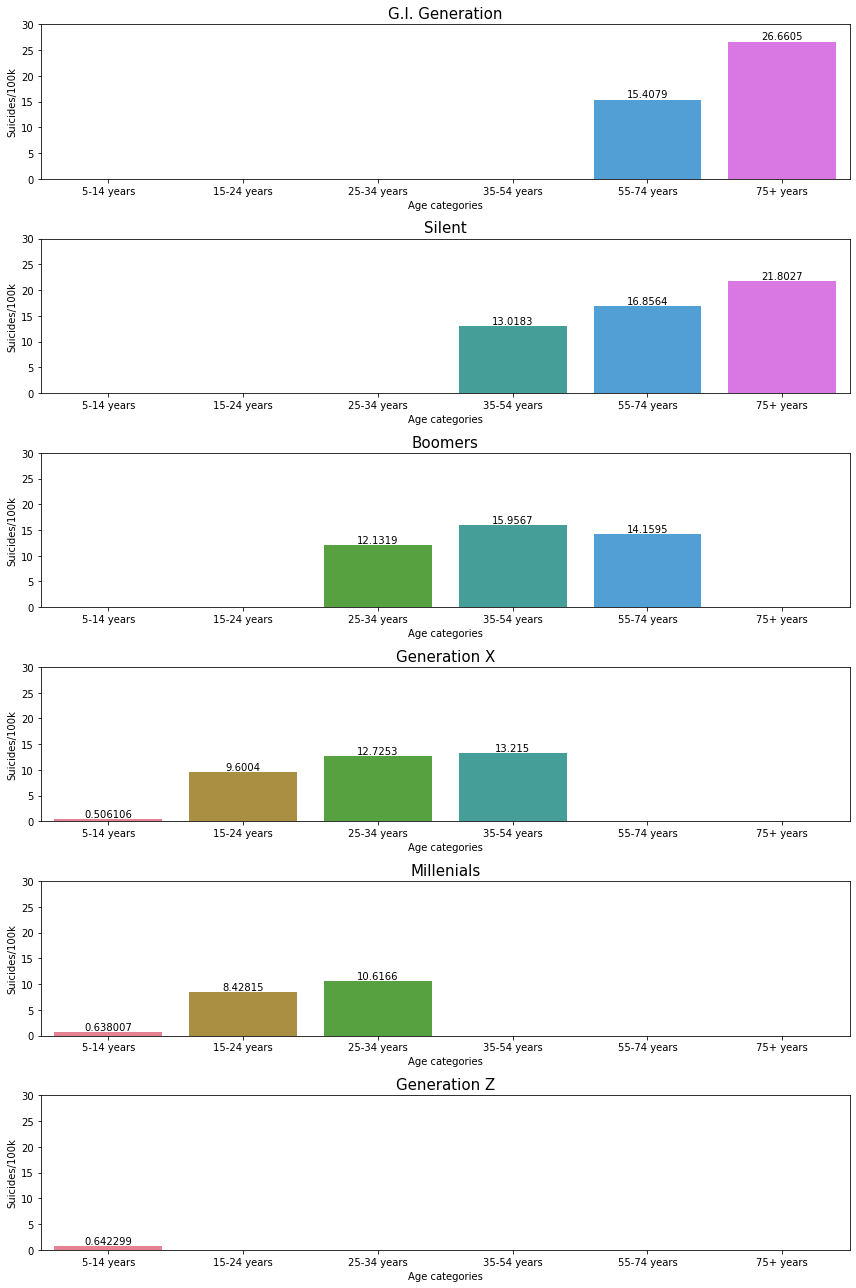

In [42]:
#Grouping our data by generation and age 
gp_gen_age_data = dt.groupby(['generation', 'age'], as_index=False).mean()

#Making a list containing all the gens 
gens = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

#Creating the axis of the plots
plt.figure(figsize=(12,18))
ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

#Making a list containing all the axes
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

#Making a for loop to plot the needed plots 
for gen, ax in zip(gens, axes):
    sns.barplot(x='age', y='suicides/100k pop', palette='husl', 
                data=gp_gen_age_data[gp_gen_age_data['generation'] == gen],
                ax=ax, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', 
                          '55-74 years', '75+ years'])
        
    ax.set_xlabel('Age categories')
    ax.set_ylabel('Suicides/100k')
    ax.set_title(gen, size=15)
    ax.set_ylim(0,30)
    for i in ax.containers:
        ax.bar_label(i,)
plt.tight_layout()

It's obvious that generally as someone's age grows his suicide rate increases. Since the data only maintains 3 generations per age group, and newer generations have not had 3 age groups yet, it's hard to draw a relationship. 

The trend between generations, doesn't decrease, for example the suicide rate of Boomers is highest at 35-54, the suicide rate of Silent is highest at 75+ years, and the suicide rate of GenX is highest at 35-54 years. The lack of data across generation is a time constraint, but it prevents us from make sufficient deductions for the pattern of the data. In any case the trend in suicide rates is definetly non-linear across generations, and with the fact that suicide rates across generations are decreasing in their peaks, having a suicide rate of 16 in Gen Alpha is unlikely.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***Advantages when using regression (as opposed to classification with
nominal features) in terms of independent variables.***

Regression isolates correlations between the independent variables and the dependent variables, while Classification learns to find patterns in categorizing data to the respective labels. In terms of independent variables, correlations describe a behaviour represented by a mathematical model, that an expected outcome is described across a continuum. Meaning you can still deduce an outcome of data with values outside the feature space. For example, I can still find a value for a datapoint with age and generation but no sex values; whereas this is impossible in a classification task because such a datapoint was never. This is called extrapolation. Furthermore, interpolation (deducing an outcome between values) is also possible. There are issues with using extrapolation in linear regression because the mean squared error increases quadratically as you move further away from the sample mean; and extrapolation becomes less viable with a larger feature space. So your prediction becomes less likely as you move further away from your training data.

This can be seen with our Generation Alpha prediction. It's two generation groups away from the data on ages between 15-24 years; so while we could make a prediction most likely it will be erroneous. Still this can be valuable in certain circumstances.

***Advantages when using regular numerical values rather than one-hot
encoding for regression.***

Another advantage is decreased dimensionality, which means that our regression will perform better, and our weights coefficients will be more readily interpretable, and less complex. One-hot encoding also introduces multicollinearity, this is where several independent variables are correlated; making regression coefficients unreliable.

***Which method do you suggest to your machine learning
model customer? Classifier or regression? Why?***

I would maintain the use of a regression model to describe this problem, the main reason why is because the target variable is continuous, and we would be severely hampering the model's predictive powers by discretizing a continous variable (Especially one that has such a skewed distribution as suicides/100k). In the future I would reattempt to model this dataset by using another regression classfier, considering the spurious data distribution, perhaps a K nearest neighbor regression algorithm or a Random Forest Ensemble Regressor.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------